# RTED-TDS Co-Sim

NPCC Case

In [1]:
%run -i 'cosim_import.py'

0.post4562.dev0+gf3ddbf9
2.8.0


In [2]:
# if save the data to CSV
save_data = False
file_beging = 'cosim_'
sim_name = 'npcc_fict'

# case parameters
case_name = 'npcc'
caseH = 18  # start time [H] of the co-simulation
ict = True
ecc = False
agc = True

# Change ``rru``, ``rrd``, ``rsfr``, ``t_total`` for necessary.
t_total = 3600

rru, rrd, rsfr = 1.0, 1.0, 0.05

In [3]:
%run -i 'cosim_setup_andes.py'

EV1: ts=18[H], 100000 EVs, Total Q=863.7 MWh
Online 28781, Q=719.29 MWh, SoC=0.7397
Power(MW): Pt=-79.1953, Pc=-79.1953, Pd=0.0
Ctrl: 0=15464; 1=13317; 
EV1: Load A from Aest.csv.


Generating code for 1 models on 8 processes.


## Load synthetic

Create load data ``d_syn``, which is a ``DataFrame`` that have three columns: ``time``, ``s10``, ``h10``. ``time`` is by seconds, ``s10`` is scalar load.

ANDES total load is: 224.344 p.u.


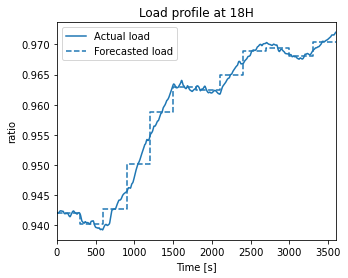

In [4]:
%run -i 'cosim_loadsyn.py'

## Setup ``ssp`` and ``ssd``

Convert ``ssa`` to pandapower net ``ssp``, add generator cost

The input cost array follow the matpower/pypower format, now only poly_cost is supported

In [5]:
%run -i 'cosim_setup_dispatch.py'

Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-08


RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=576402.303


## Loop

In the loop, there are mainly X parts:

- interval RTED: run DCOPF (``ssd.mdl``), run ACOPF(``ssp``), 

- interval AGC: do AGC, do dispatch with smooth setpoints

- interval PQ: alter load, run TDS(``ssa.TDS``)

Notes:

- The setpoints for DG are coded but not verified yet.

- After the development of ANDES control room, the dispatch and AGC part can be refactored.

- interface variables: ``DG.pmx``: DPV profile, ``DG.pref0``: setpoints, ``DG.pext0``: AGC

- ACOPF in pandapower considered generator limtis of ramping and SFR reserve

Loop

In [6]:
%run -i 'cosim_main.py'

  0%|                                                                                                                                                    | 0/3600 [00:00<?, ?it/s]RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED is solved.
RTED: total cost=576378.021
  8%|███████████▌                                                                                                                              | 300/3600 [00:36<06:44,  8.16it/s]RTED GB model is loaded.
RTED is solved.
RTED: total cost=576377.588
 17%|███████████████████████                                                                                                                   | 600/3600 [01:16<08:17,  6.03it/s]RTED GB model is loaded.
RTED is solved.
RTED: total cost=576376.132
 25%|██████████████████████████████████▌                                                                                                       | 900/3600 [02:00<06:30,  6.91it/s]RTED GB model is loaded.
RTED is solved.
RTED: t

In [1]:
cpdf = pd.DataFrame()
cpdf['gen'] = ssd.gen['idx']
cpdf['pmax'] = ssd.gen['pmax']
cpdf['pmin'] = ssd.gen['pmin']
cpdf.reset_index(inplace=True, drop=True)
cpdf['pdc'] = ssd.res['pg']
cpdf['pac'] = ac_res['p']
# cpdf

NameError: name 'pd' is not defined

In [ ]:
ssa.exit_code

(<Figure size 432x216 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

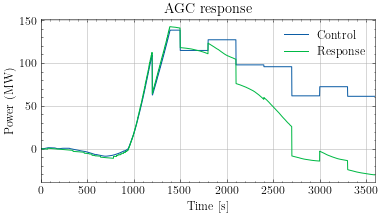

In [8]:
sse.ict()
sse.plot_agc(style='science')

ValueError: Length of values (667800) does not match length of index (111300)

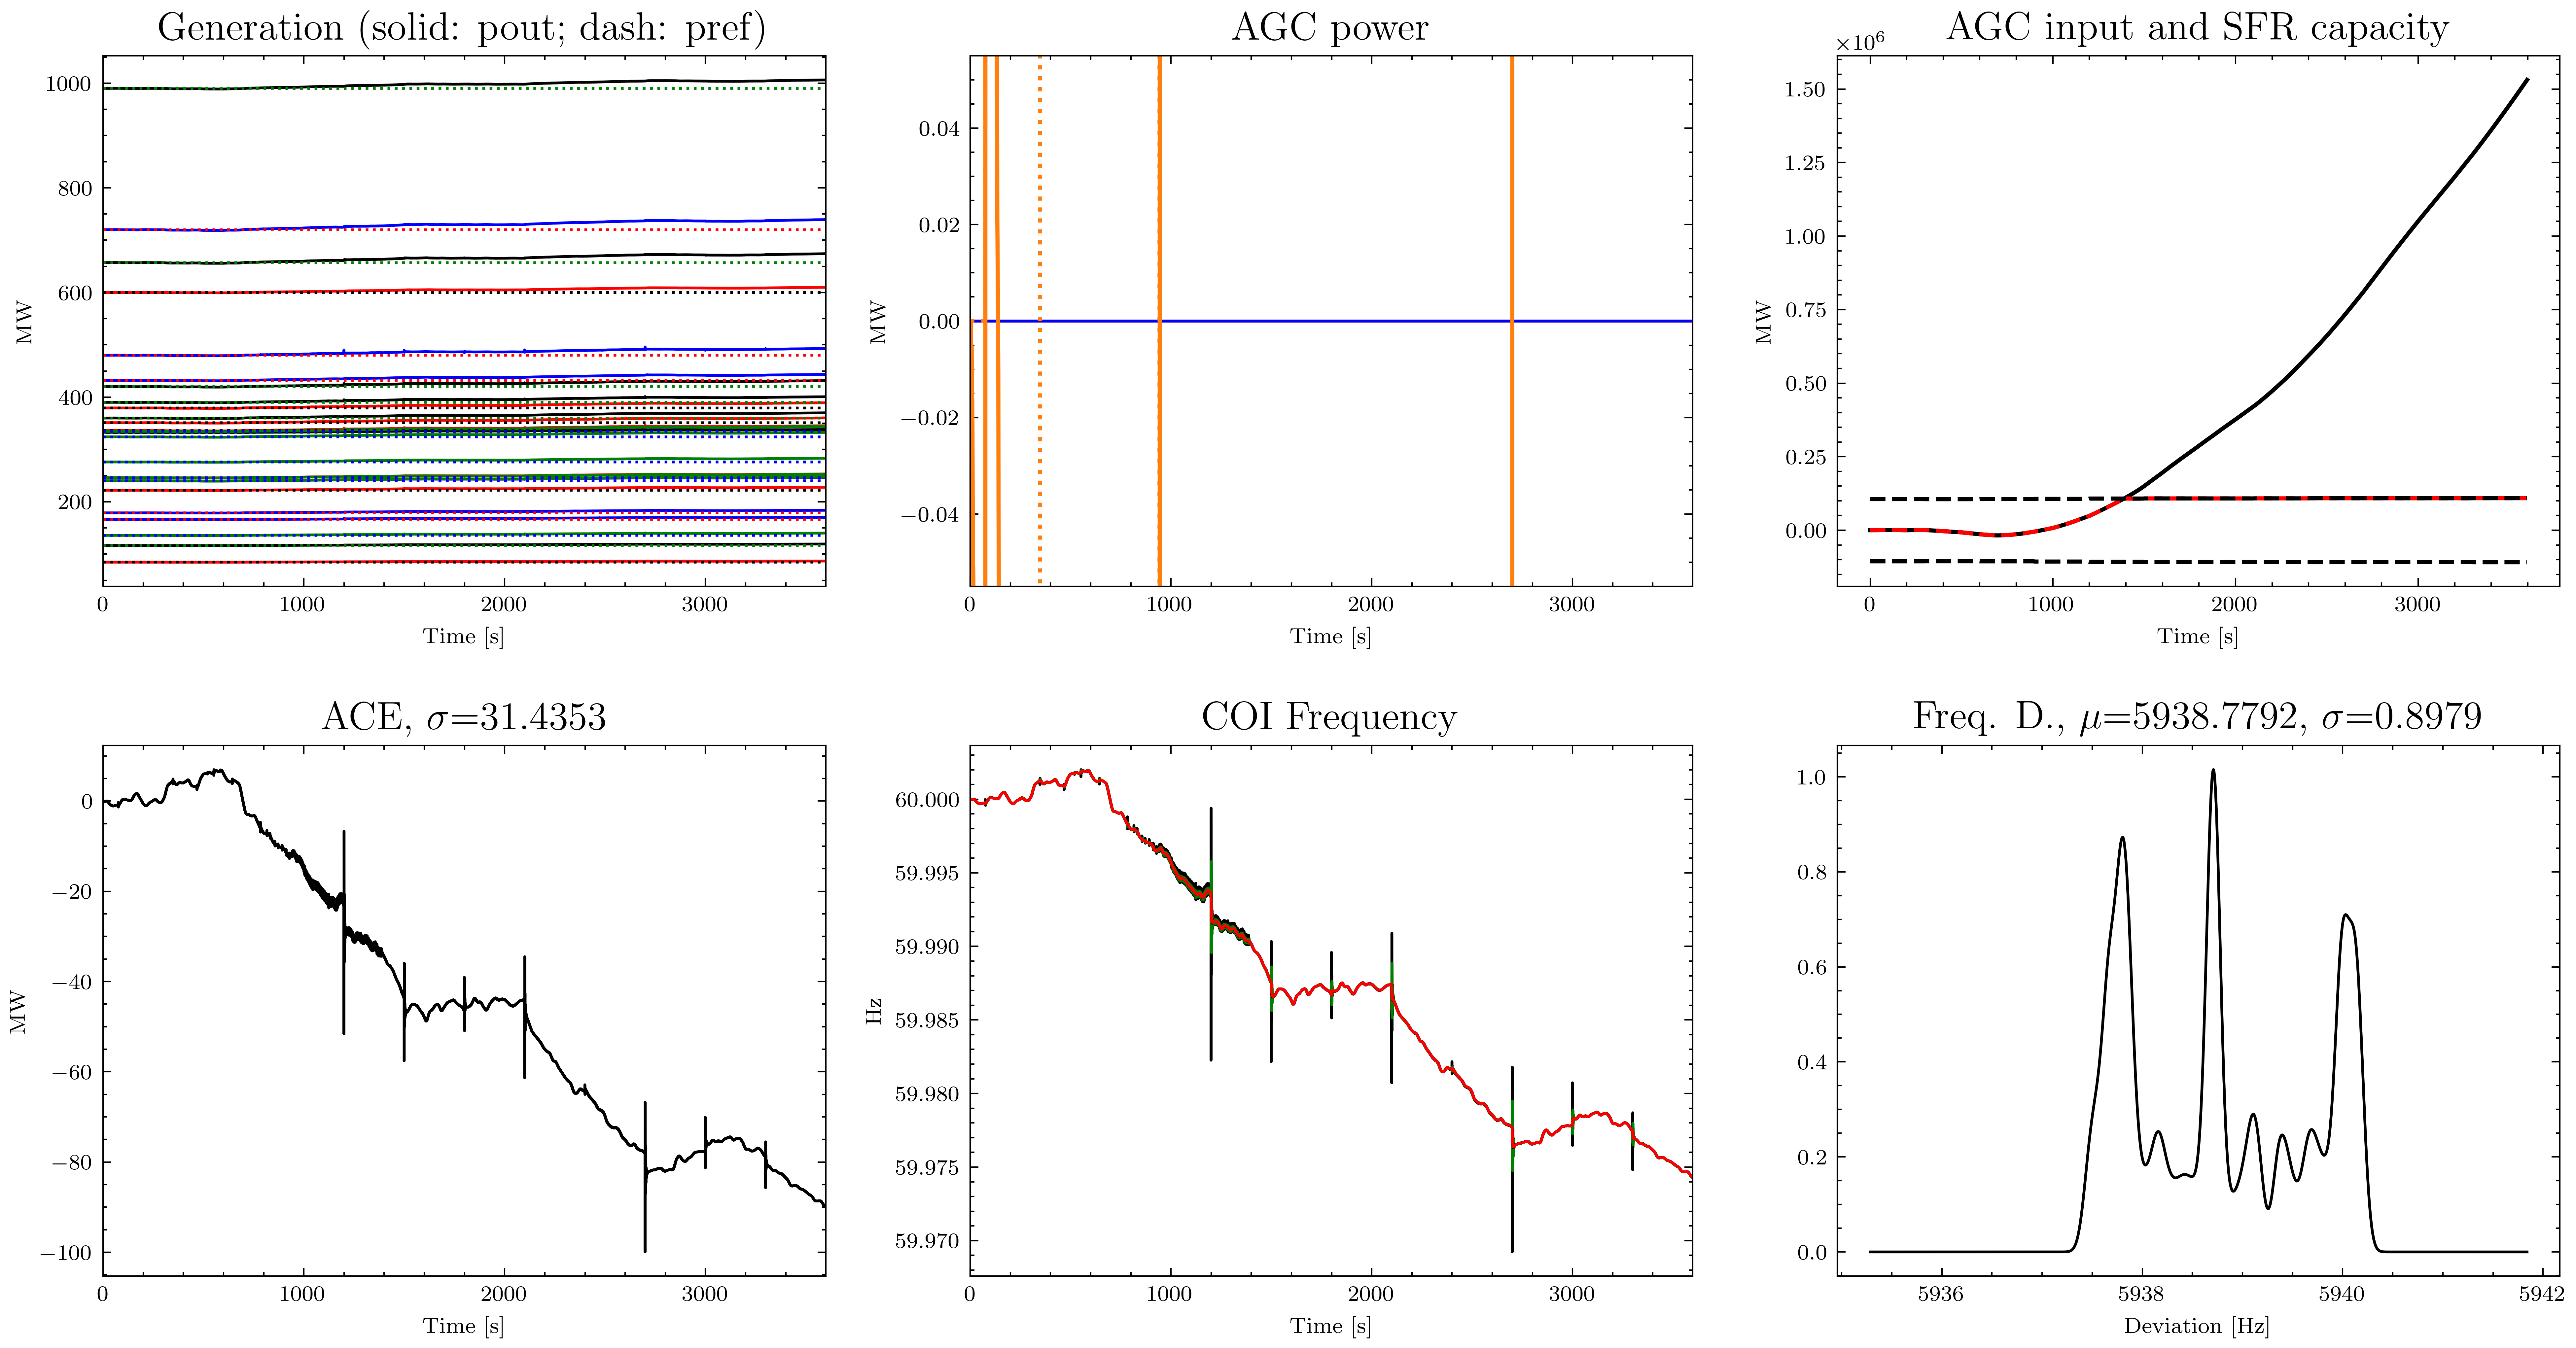

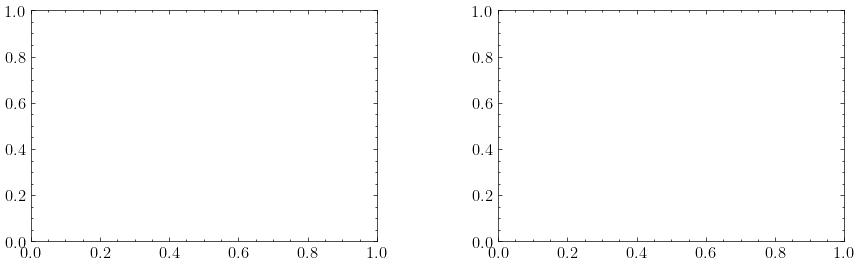

In [52]:
%run -i 'cosim_plot.py'

In [53]:
%run -i 'cosim_savedata.py'